<a href="https://colab.research.google.com/github/RDiPiazza/CommentMe/blob/master/551_kaggle_raph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. How to Use

### 1. Google Drive Setup
  - Clone repository 'comp_551_kaggle' to local machine (after accepting invite).
 
 - Open Drive and create a new folder called __'collab_notebooks'__ under 'My Drive' i.e. full path __'My Drive/collab_notebooks'__
 
 - Upload zip files __all.zip__ and __denoised_datasets_v3.zip__ and notebook __551_kaggle_omer.ipynb__ to My Drive /collab_notebooks.
 
 - Open 551_kaggle_omer.ipynb and rename notebook to __551_kaggle_[your_name].ipynb __ by clicking on the title above.
 
### 2. Notebook Setup 
 - After uploading the correct zip files and renaming the notebook as above, turn on Hardware acceleration for the notebook by opening __Edit -> Notebook settings__ and selecting __GPU__ in the Hardware acceleration drop-down.
 
 - To commit the notebook to the repo, first go to __Tools -> Preferences__ and check __Request GitHub access to view and edit private repositories and organizations__.
 
 - Then making sure that you renamed the notebook correctly first, go to __File->Save a copy in GitHub__ . __Make sure to select the correct repo from the 'Repository' drop down__ i.e. _comp_551_kaggle_. Change the file path to __notebooks/551_kaggle_[your name].ipynb__ and write a commit message then click ok.
 
### 3. Notebook Usage
  - After completing __1.__ and __2.__, to use the notebook, first make sure to run all the cells in sections __Setting up envirnoment__ and __Imports__. 
  - Next load in the denoised images by running all the cells in section __Loading in Denoised Datasets__.
    - To load in original images, run all cells in section __Loading in Image Data__.
  - Then, if you want to run PCA first on the loaded in dataset, run all the cells in section __Preprocessing - Dimensionality Reduction__.
  - To train a new model, add a new __Attempt XX - XXX__ to the notebook and proceed as in __Baselines - XXX__ or __Attempt 1__ etc.

# 1. Setting up environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# File system
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G  8.4G  332G   3% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
/dev/sda1       365G   11G  355G   3% /opt/bin
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.6G   13G  18% /content/drive


In [3]:
# GPU --- https://stackoverflow.com/questions/48750199/google-colaboratory-misleading-information-about-its-gpu-only-5-ram-available
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: Name:{0} | {1:.0f}MB | Used: {2:.0f}MB | Util {3:3.0f}% | Total {4:.0f}MB".format(gpu.name, gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

print("\n--------------------------------------------------------------------------------")
printm()
print("--------------------------------------------------------------------------------\n")


--------------------------------------------------------------------------------
Gen RAM Free: 12.9 GB  | Proc size: 139.1 MB
GPU RAM Free: Name:Tesla K80 | 11441MB | Used: 0MB | Util   0% | Total 11441MB
--------------------------------------------------------------------------------



In [4]:
# Memory - General
!cat /proc/meminfo

MemTotal:       13335204 kB
MemFree:         8109780 kB
MemAvailable:   12586568 kB
Buffers:           95748 kB
Cached:          4498616 kB
SwapCached:            0 kB
Active:           722024 kB
Inactive:        4194852 kB
Active(anon):     284264 kB
Inactive(anon):      308 kB
Active(file):     437760 kB
Inactive(file):  4194544 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               796 kB
Writeback:             0 kB
AnonPages:        318504 kB
Mapped:           248416 kB
Shmem:               840 kB
Slab:             202936 kB
SReclaimable:     170704 kB
SUnreclaim:        32232 kB
KernelStack:        3968 kB
PageTables:         5140 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667600 kB
Committed_AS:    2019372 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [5]:
!ls "/content/drive/My Drive/"

 collab_notebooks				     DPM
'COMP 551 - Project'				    'ECSE 324'
'Consulting Prep'				    'ECSE 415'
'CV_Raphael_Di_Piazza_ENG (1).pdf'		    'ECSE 420'
 CV_Raphael_Di_Piazza_ENG.pdf			    'GEOG 200'
'CV_Raphael_Di_Piazza_ENG - Raphael Di Piazza.pdf'   LYCEE
'DESIGN PROJECT'				     Random


In [6]:
!pip install numpy

In [7]:
!pip uninstall scikit-learn -y

Uninstalling scikit-learn-0.21.dev0:
  Successfully uninstalled scikit-learn-0.21.dev0


In [8]:
!pip install Cython

In [9]:
!pip install git+git://github.com/scikit-learn/scikit-learn.git

  Cloning git://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-opu06ckc
  Running setup.py bdist_wheel for scikit-learn ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /tmp/pip-ephem-wheel-cache-dnirx_ao/wheels/a1/50/0e/316ef2ff8d4cfade292bd20b49efda94727688a153382745a6
Successfully built scikit-learn


In [10]:
!pip freeze | grep scikit

scikit-image==0.13.1
scikit-learn==0.21.dev0


In [11]:
!pip install seaborn

# 2. Imports

In [0]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
import skimage.filters as skifilters
import skimage.restoration as skirestore
# from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
#                                  denoise_wavelet, estimate_sigma)
import skimage.morphology as skimorph
import skimage.exposure as skiexpose
import skimage
import scipy

# 3. Loading in Image Data

In [0]:
!unzip "/content/drive/My Drive/collab_notebooks/all.zip" -d "dataset"

Archive:  /content/drive/My Drive/collab_notebooks/all.zip
  inflating: dataset/sample_submission.csv  
  inflating: dataset/train_labels.csv  
  inflating: dataset/test_images.npy  
  inflating: dataset/train_images.npy  


In [0]:
!ls -al "dataset"
#!cat "dataset/train_labels.csv"

total 1563488
drwxr-xr-x 2 root root      4096 Nov 20 03:54 .
drwxr-xr-x 1 root root      4096 Nov 20 03:54 ..
---------- 1 root root    124296 Oct 30 20:02 sample_submission.csv
---------- 1 root root 800369288 Oct 30 20:02 test_images.npy
---------- 1 root root 800369288 Oct 30 20:02 train_images.npy
---------- 1 root root    124296 Oct 30 20:02 train_labels.csv


In [0]:
# Loading in Training Data
X = np.load("./dataset/train_images.npy", encoding='latin1')

# Loading in sample labels
y = np.genfromtxt("./dataset/train_labels.csv", delimiter=',', dtype=None, names=True, encoding='latin1')
y = np.array([label for id_x, label in y])

print("y shape: ", y.shape, "\n")
print("X shape: ", X.shape, "\n")
print("y and type(y) = ", y, type(y), "\n")
print("X: ", X, "\n")
print("X[:, 1]: ", X[:, 1], "\n")

y shape:  (10000,) 

X shape:  (10000, 2) 

y and type(y) =  ['shovel' 'rifle' 'scorpion' ... 'rollerskates' 'mouth' 'pencil'] <class 'numpy.ndarray'> 

X:  [[0 array([0., 0., 0., ..., 0., 0., 0.])]
 [1 array([0., 0., 0., ..., 0., 0., 0.])]
 [2 array([0., 0., 0., ..., 0., 0., 0.])]
 ...
 [9997 array([0., 0., 0., ..., 0., 0., 0.])]
 [9998 array([255., 255., 255., ...,   0.,   0.,   0.])]
 [9999 array([0., 0., 0., ..., 0., 0., 0.])]] 

X[:, 1]:  [array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) ...
 array([0., 0., 0., ..., 0., 0., 0.])
 array([255., 255., 255., ...,   0.,   0.,   0.])
 array([0., 0., 0., ..., 0., 0., 0.])] 



# 4. Pre-processing - Splitting

In [0]:
# Splitting, standardizing and applying PCA
def flattenX(X):
  return X.ravel()


# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:, 1], y, train_size=0.8, test_size=0.2) # Training on D = (X_train, y_train); Testing/Validation on (X_test, y_test)
X_train = np.stack(X_train)
X_test = np.stack(X_test)

print("y_train shape: ", y_train.shape, "\n")
print("X_train shape: ", X_train.shape, "\n")
print("y_train: ", y_train, "\n")
print("X_train: ", X_train,"\n")

print("y_test shape: ", y_test.shape, "\n")
print("X_test shape: ", X_test.shape, "\n")
print("y_test: ", y_test, "\n")
print("X_test: ", X_test,"\n")

y_train shape:  (8000,) 

X_train shape:  (8000, 10000) 

y_train:  ['paintbrush' 'mouth' 'sink' ... 'octagon' 'skateboard' 'sailboat'] 

X_train:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

y_test shape:  (2000,) 

X_test shape:  (2000, 10000) 

y_test:  ['mug' 'pencil' 'pool' ... 'rabbit' 'rabbit' 'moustache'] 

X_test:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 



# 5. Pre-processing - Standardizing

In [0]:
# Standardizing dataset
#np.set_printoptions(threshold=20000, suppress=False)
# Using scikit-learn's StandardScaler to standardize/nomalize dataset 
# NOTE: fitting (i.e. computing mean and sigma for scaling) ONLY on training set X_train
#       BUT transforming (i.e. standardize/normalize) on BOTH training and validation/testing sets

def compute_and_print_mean_and_std(X):
  #rows, cols = X.shape
  Col_mets = np.empty((0, 2), dtype=np.float64)
  
  for id_c, col in enumerate(X.T):
    # Compute mean and std 
    col_mean = np.mean(col)
    col_std = np.std(col)
    col_met = np.array([[col_mean, col_std]])
    Col_mets = np.append(Col_mets, col_met, axis=0)
    
  return Col_mets

print("BEFORE Standardization:", "\n")
print("X_train------------------------------------\n")
Col_mets_train = compute_and_print_mean_and_std(X_train)
print("column mean; column std")
print("shape = ", Col_mets_train.shape)
print(Col_mets_train)
print("\nX_train shape: ", X_train.shape, "\n")
print("X_test--------------------------------------\n")
Col_mets_test = compute_and_print_mean_and_std(X_test)
print("column mean; column std")
print("shape = ", Col_mets_test.shape)
print(Col_mets_test)
print("\nX_test shape: ", X_test.shape, "\n")


# Standardizing using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fitting on training data ONLY
scaler.fit(X_train) 
# Standardizing/Transforming BOTH training AND validation/testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("---------------------------------------------")
print("---------------------------------------------")
print("AFTER Standardization:")
print("X_train------------------------------------\n")
Col_mets_train = compute_and_print_mean_and_std(X_train)
print("column mean; column std")
print("shape = ", Col_mets_train.shape)
print(Col_mets_train)
print("\nX_train shape: ", X_train.shape, "\n")
print("X_test--------------------------------------\n")
Col_mets_test = compute_and_print_mean_and_std(X_test)
print("column mean; column std")
print("shape = ", Col_mets_test.shape)
print(Col_mets_test)
print("\nX_test shape: ", X_test.shape, "\n")

BEFORE Standardization: 

X_train------------------------------------

column mean; column std
shape =  (10000, 2)
[[ 4.77175    31.3506005 ]
 [ 5.1455     31.62156432]
 [ 9.49525    43.83754643]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]

X_train shape:  (8000, 10000) 

X_test--------------------------------------

column mean; column std
shape =  (10000, 2)
[[ 4.846      31.66132158]
 [ 5.4475     33.16349263]
 [ 8.9725     42.20600365]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]

X_test shape:  (2000, 10000) 

---------------------------------------------
---------------------------------------------
AFTER Standardization:
X_train------------------------------------

column mean; column std
shape =  (10000, 2)
[[-3.64153152e-17  1.00000000e+00]
 [ 5.77315973e-18  1.00000000e+00]
 [-7.32747196e-18  1.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000

# 4. Pre-processing - Brightening

ORIGNAL IMAGES:


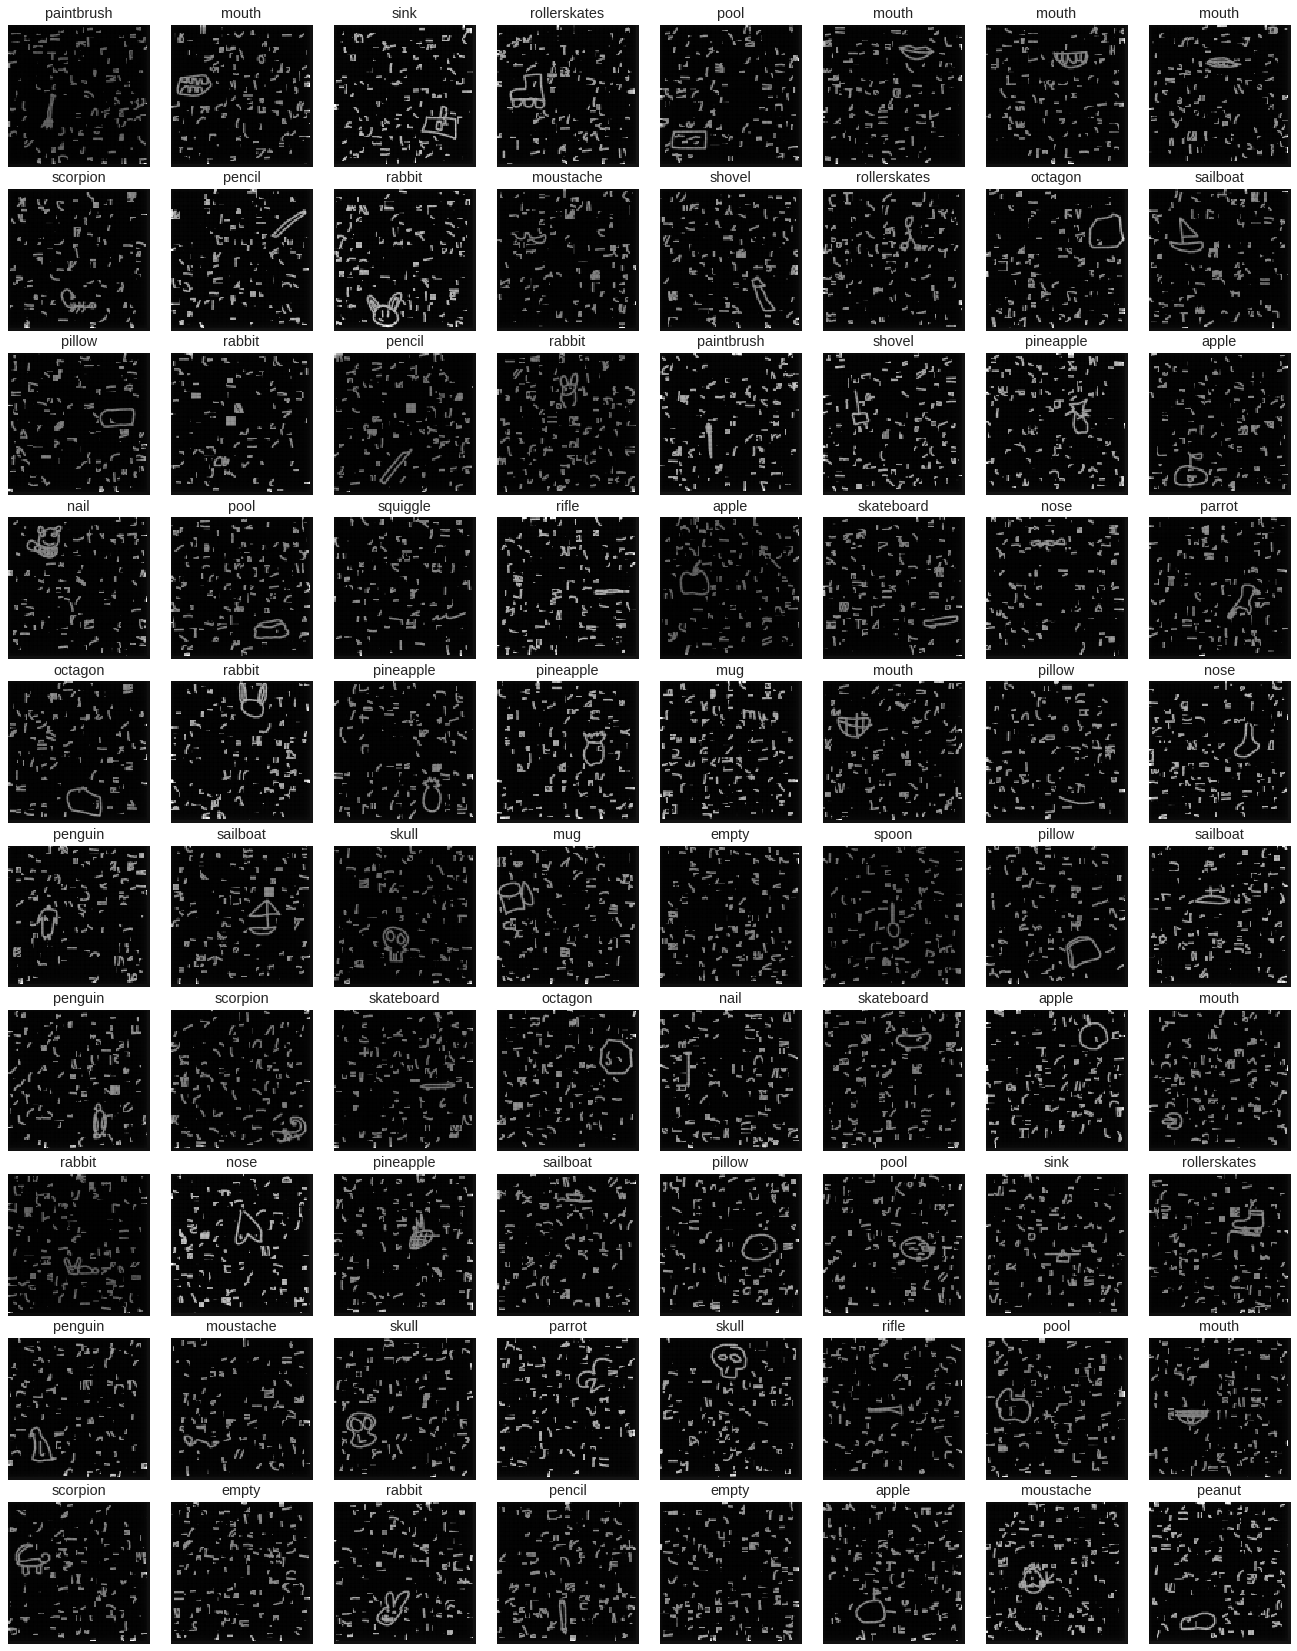

		min pixel intensity value:  -0.45834180937390456 , max pixel intensity value:  9.90848277260056 , mean pixel intensity value:  4.358291505468514e-19
RESCALED IMAGES:


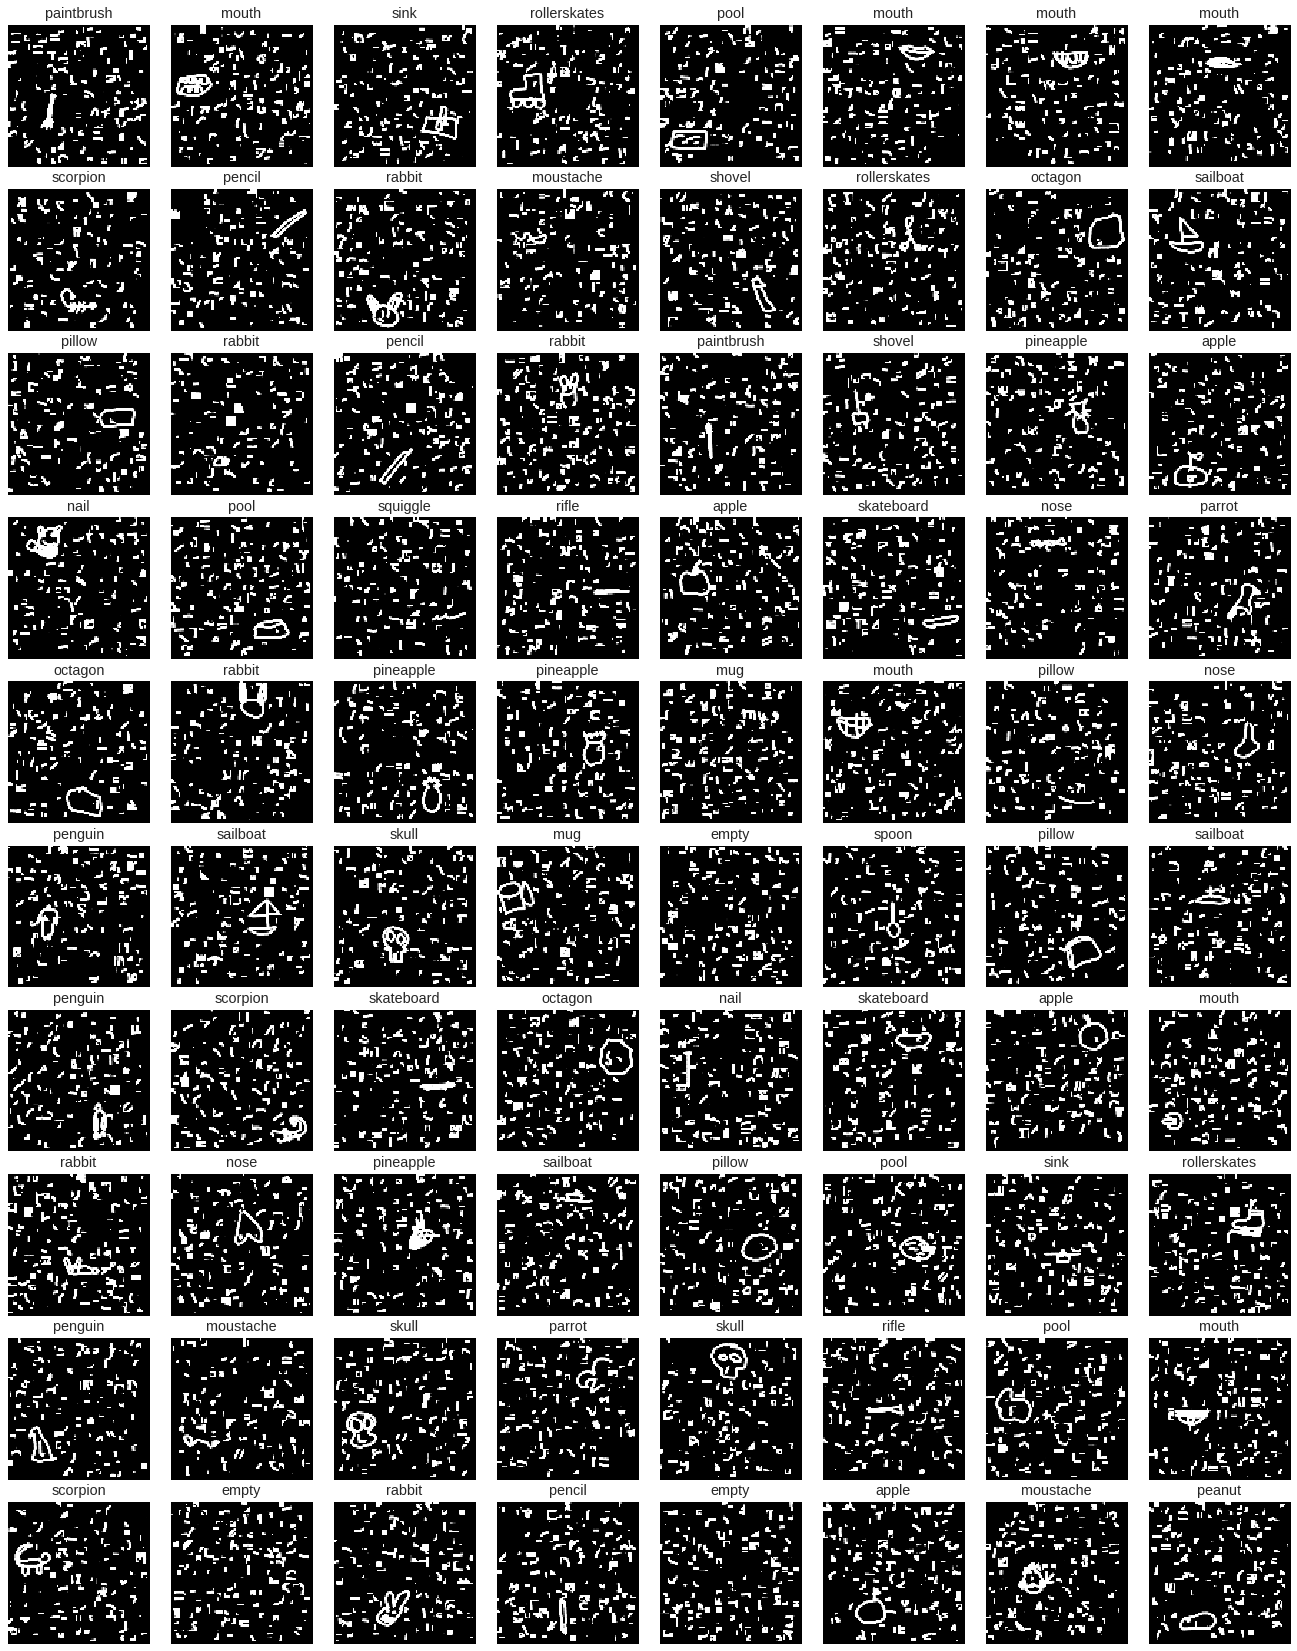

		min pixel intensity value:  0.0 , max pixel intensity value:  1.0 , mean pixel intensity value:  0.11997711335204857


In [0]:
# Brightening images (X_train, y_train) XX (X_test, y_test)
np.set_printoptions(threshold=1000, suppress=False)
def plot_images(X, x_labels, columns, rows, zscale):
  fig = plt.figure(figsize=(zscale*(columns+1), zscale*(rows+1)))
  gs = gridspec.GridSpec(rows, columns, wspace=0.05, hspace=0.15, 
                        top=1-0.5/(rows+1), bottom=0.5/(rows+1), 
                        left=0.5/(columns+1), right=1-0.5/(columns+1))
  
  for i in range(rows):
    for j in range(columns):
      image = X[i*columns + j]
      image = np.reshape(image, (100, 100))
      ax = plt.subplot(gs[i, j])
      ax.imshow(image, cmap='gray')
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_xticklabels([])
      ax.set_yticklabels([])
      ax.set_title(x_labels[i*columns + j])
  plt.show()
  
def brighten_images(X):
  _, cols = X.shape
  X_rescaled = np.empty((0, cols), dtype=np.float64)
  
  for x in X:
    x = np.reshape(x, (100, 100))
    
    # Applying constrast streching rescaling
    x_rescaled = skiexpose.rescale_intensity(x, in_range=(0., 1.))
    
    X_rescaled = np.append(X_rescaled, np.array([x_rescaled.flatten()]), axis=0)
   
  return X_rescaled

#Printing:
num_pics = 80
num_cols = 8
num_rows = (num_pics//num_cols)
zscale = 2.25
X_bright = brighten_images(X_train[0:num_pics])
print("ORIGNAL IMAGES:")
plot_images(X_train, y_train, num_cols, num_rows, zscale)
X_train_flat = flattenX(X_train)
print("\t\tmin pixel intensity value: ", np.min(X_train_flat), ", max pixel intensity value: ", np.max(X_train_flat), ", mean pixel intensity value: ", np.average(X_train_flat))
print("RESCALED IMAGES:")
plot_images(X_bright, y_train, num_cols, num_rows, zscale)
X_bright_flat = flattenX(X_bright[0:num_pics])
print("\t\tmin pixel intensity value: ", np.min(X_bright_flat), ", max pixel intensity value: ", np.max(X_bright_flat), ", mean pixel intensity value: ", np.average(X_bright_flat))

#Rescaling all of X_train and X_test
X_train_bright = brighten_images(X_train)
X_test_bright = brighten_images(X_test)

# 6. Pre-processing - Denoising

ORIGNAL IMAGES:


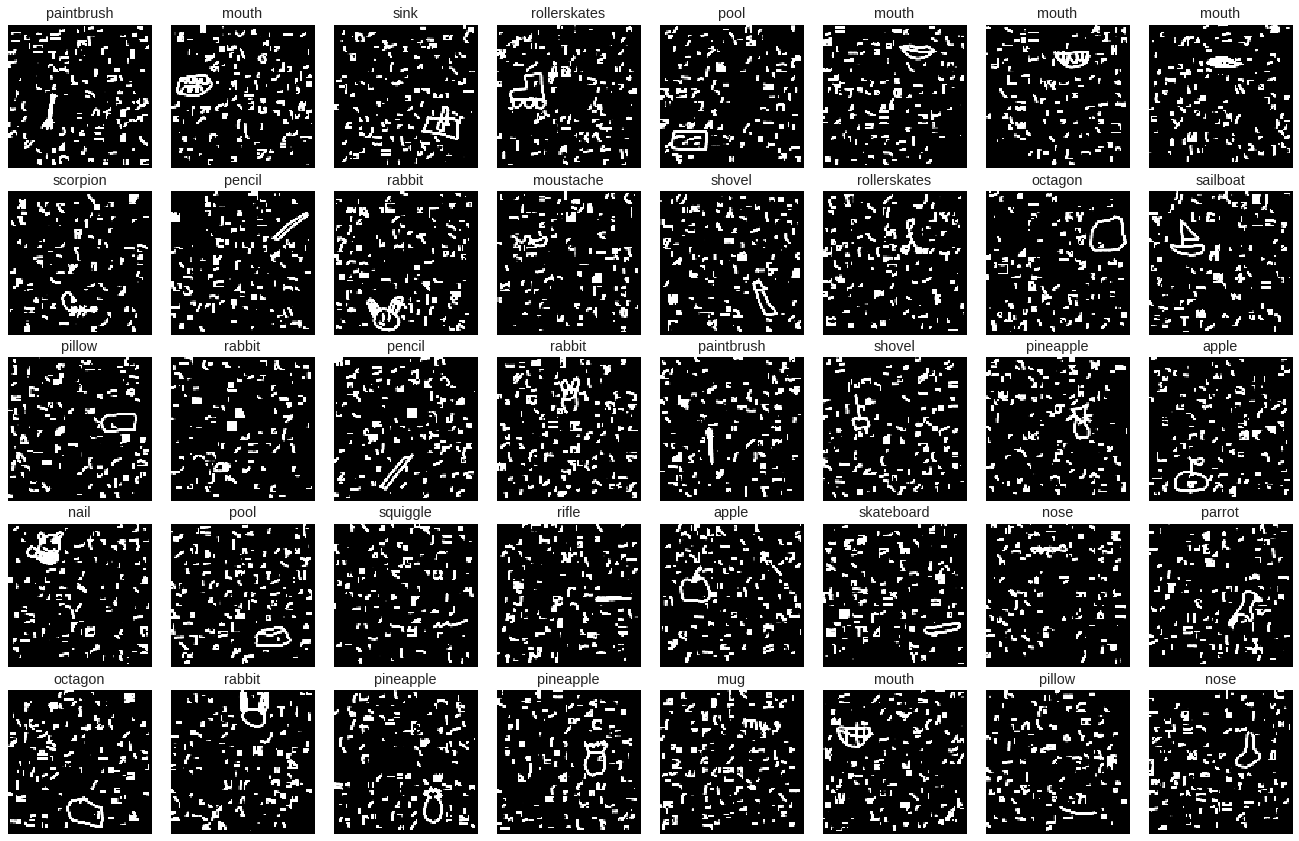

		min pixel intensity value:  0.0 , max pixel intensity value:  1.0 , mean pixel intensity value:  0.11878405234282174
PROCESSED IMAGES:


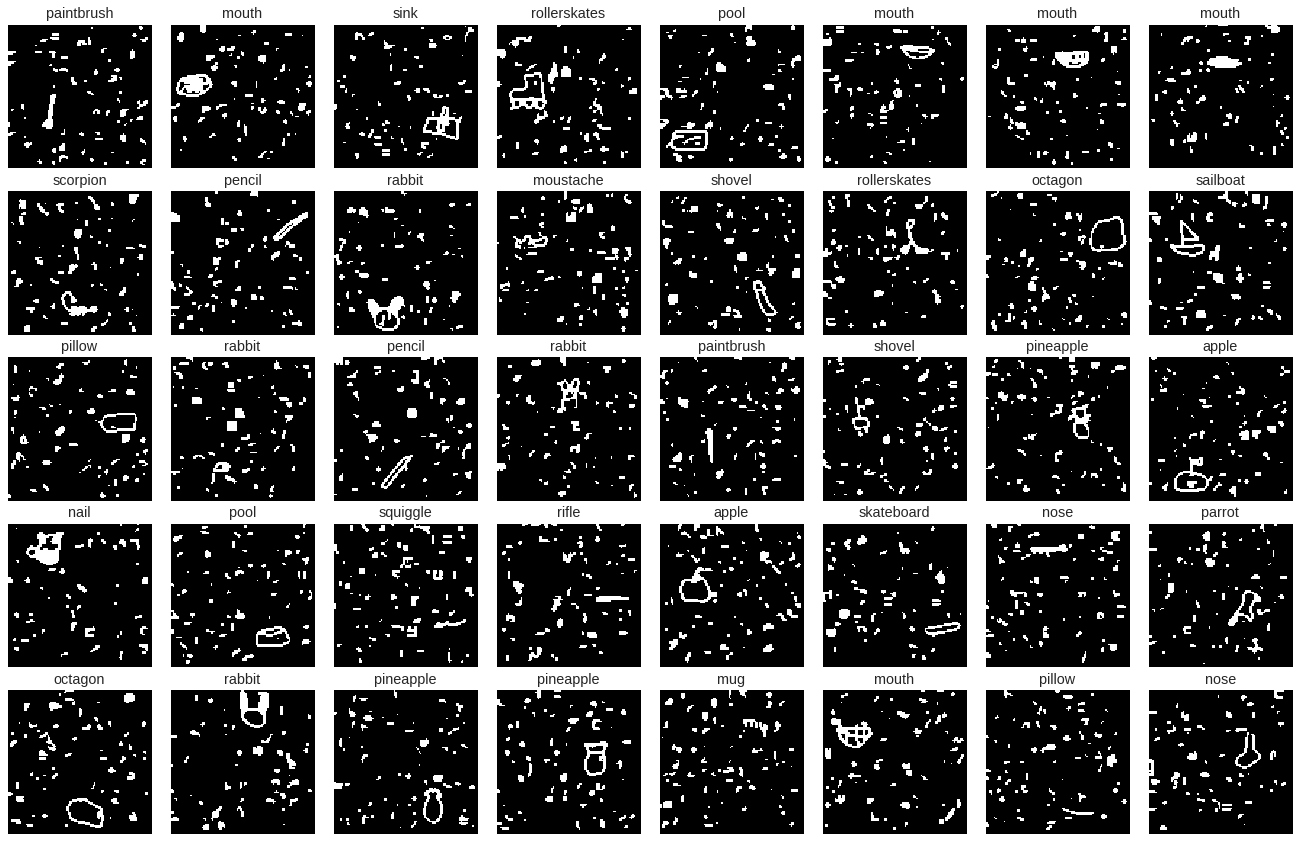

		min pixel intensity value:  0.0 , max pixel intensity value:  1.0 , mean pixel intensity value:  0.0704775
Denoising training and validation sets...
		......progress =>  1000  processed.....
		......progress =>  2000  processed.....
		......progress =>  3000  processed.....
		......progress =>  4000  processed.....
		 ------------ error!! ; num_errors =  1
		 ------------------ count =  4090
		......progress =>  5000  processed.....
		......progress =>  6000  processed.....
		......progress =>  7000  processed.....
		......progress =>  8000  processed.....
		......progress =>  1000  processed.....
		......progress =>  2000  processed.....
........done.
		 -- error count =  1
		  0.0001 %


In [0]:
# Image denoising and filtering (X_train_bright, y_train) XX (X_test_bright, y_test)
np.set_printoptions(threshold=1000, suppress=False)
#(based on http://blog.mathocr.com/2017/06/25/image-processing-for-text-recognition.html)
def process_images(X):
  _, cols = X.shape
  X_processed = np.empty((0, cols), dtype=np.float64)
  X_blurred = np.empty((0, cols), dtype=np.float64)
  num_errors = 0
  count = 0
  
  for x in X:
    x_reshaped = np.reshape(x, (100, 100))
    
    # Using Gaussian total variation filter for denoising/blurring 
    x_sigma = np.std(x)
    x_blurred = skirestore.denoise_tv_chambolle(x_reshaped, weight=0.7150*x_sigma, multichannel=False, eps=0.02)
    X_blurred = np.append(X_blurred, np.array([x_blurred.flatten()]), axis=0)
    
    # Non-local means filter denoising
    patch_dict = dict(patch_size=7,      # 5 => 5x5 patches
                patch_distance=6)  # 6 => 13x13 search area
    x_nl_filter = skirestore.denoise_nl_means(image=x_blurred, h=0.77*x_sigma, fast_mode=False, multichannel=False, **patch_dict)
    
    # Thresholding (local) in order to seperate drawing from background (using HOG)
    #threshold_x = skifilters.threshold_local(x_nl_filter, block_size=5, offset=1)
    #threshold_x = skifilters.threshold_minimum(x_nl_filter)
    #threshold_x = skifilters.threshold_sauvola(x_nl_filter, window_size=3)
    try:
      threshold_x = skifilters.threshold_minimum(x_nl_filter)
      x_processed = x_nl_filter > threshold_x
    except RuntimeError:
      num_errors += 1
      x_processed = x_nl_filter
      print("\t\t ------------ error!! ; num_errors = ", num_errors)
      print("\t\t ------------------ count = ", count)
      
    count += 1
    if count % 1000 == 0:
      print("\t\t......progress => ", count, " processed.....")
    X_processed =  np.append(X_processed, np.array([x_processed.flatten()]), axis=0)
    
  return (X_blurred, X_processed, num_errors)

#Printing:
num_pics = 40
num_cols = 8
num_rows = (num_pics//num_cols)
zscale = 2.25
X_blurred, X_processed, _ = process_images(X_train_bright[0:num_pics])
print("ORIGNAL IMAGES:")
plot_images(X_train_bright, y_train, num_cols, num_rows, zscale)
X_train_flat = flattenX(X_train_bright)
print("\t\tmin pixel intensity value: ", np.min(X_train_flat), ", max pixel intensity value: ", np.max(X_train_flat), ", mean pixel intensity value: ", np.average(X_train_flat))
# print("BLURRED IMAGES:")
# plot_images(X_blurred, y_train, num_cols, num_rows, zscale)
# X_blurred_flat = flattenX(X_blurred[0:num_pics])
# print("\t\tmin pixel intensity value: ", np.min(X_blurred_flat), ", max pixel intensity value: ", np.max(X_blurred_flat), ", mean pixel intensity value: ", np.average(X_blurred_flat))
print("PROCESSED IMAGES:")
plot_images(X_processed, y_train, num_cols, num_rows, zscale)
X_processed_flat = flattenX(X_processed[0:num_pics])
print("\t\tmin pixel intensity value: ", np.min(X_processed_flat), ", max pixel intensity value: ", np.max(X_processed_flat), ", mean pixel intensity value: ", np.average(X_processed_flat))

# Denoising all of X_train_bright and X_test_bright
print("Denoising training and validation sets...")
_, X_train_denoised, errors_count_train = process_images(X_train_bright)
_, X_test_denoised, errors_count_test = process_images(X_test_bright)
print("........done.")
errors_count = errors_count_train + errors_count_test
print("\t\t -- error count = ", errors_count)
print("\t\t ", errors_count/10000, "%")

# 7. Saving denoised image datasets

In [0]:
np.save('train_images_denoised.npy', X_train_denoised)
np.save('train_images_denoised_labels.npy', y_train)
np.save('test_images_denoised.npy', X_test_denoised)
np.save('test_images_denoised_labels.npy', y_test)

In [0]:
!mkdir "denoised_dataset2"
!cp  "train_images_denoised.npy" "train_images_denoised_labels.npy" "test_images_denoised.npy" "test_images_denoised_labels.npy" "denoised_dataset2"
!ls -al "denoised_dataset2"

total 781740
drwxr-xr-x 2 root root      4096 Nov 20 10:25 .
drwxr-xr-x 1 root root      4096 Nov 20 10:25 ..
-rw-r--r-- 1 root root     96128 Nov 20 10:25 test_images_denoised_labels.npy
-rw-r--r-- 1 root root 160000128 Nov 20 10:25 test_images_denoised.npy
-rw-r--r-- 1 root root    384128 Nov 20 10:25 train_images_denoised_labels.npy
-rw-r--r-- 1 root root 640000128 Nov 20 10:25 train_images_denoised.npy


In [0]:
!zip -r "denoised_datasets.zip" "denoised_dataset2"

  adding: denoised_dataset2/ (stored 0%)
  adding: denoised_dataset2/test_images_denoised_labels.npy (deflated 96%)
  adding: denoised_dataset2/test_images_denoised.npy (deflated 99%)
  adding: denoised_dataset2/train_images_denoised_labels.npy (deflated 96%)
  adding: denoised_dataset2/train_images_denoised.npy (deflated 99%)


In [0]:
!cp "denoised_datasets.zip" "/content/drive/My Drive/collab_notebooks/"
!ls -al "/content/drive/My Drive/collab_notebooks/"

total 90095
-rw------- 1 root root  2727970 Nov 20 10:26 551_kaggle.ipynb
drwx------ 2 root root     4096 Nov 15 08:03 551_project
-rw------- 1 root root    19612 Nov 15 17:30 551_project_notes.ipynb
-rw------- 1 root root 75771842 Nov 13 20:31 all.zip
drwx------ 2 root root     4096 Nov 14 16:11 dataset
-rw------- 1 root root 13727792 Nov 20 10:26 denoised_datasets.zip


# 8. Loading in Denoised Datasets 

In [13]:
!unzip "/content/drive/My Drive/collab_notebooks/denoised_datasets_v3.zip" -d "denoised_dataset_v3"

Archive:  /content/drive/My Drive/collab_notebooks/denoised_datasets_v3.zip
replace denoised_dataset_v3/denoised_dataset4/test_images_denoised_labels.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: denoised_dataset_v3/denoised_dataset4/test_images_denoised_labels.npy  
replace denoised_dataset_v3/denoised_dataset4/test_images_denoised.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: denoised_dataset_v3/denoised_dataset4/test_images_denoised.npy  
  inflating: denoised_dataset_v3/denoised_dataset4/train_images_denoised.npy  
  inflating: denoised_dataset_v3/denoised_dataset4/train_images_denoised_labels.npy  


In [15]:
!ls -al "denoised_dataset_v3/denoised_dataset4"

total 781740
drwxr-xr-x 2 root root      4096 Nov 24 03:58 .
drwxr-xr-x 3 root root      4096 Nov 23 23:08 ..
-rw-r--r-- 1 root root     96128 Nov 21 05:50 test_images_denoised_labels.npy
-rw-r--r-- 1 root root 160000128 Nov 21 05:50 test_images_denoised.npy
-rw-r--r-- 1 root root    384128 Nov 21 05:50 train_images_denoised_labels.npy
-rw-r--r-- 1 root root 640000128 Nov 21 05:50 train_images_denoised.npy


In [16]:
# Loading in Training Data
X_train_preprocessed = np.load("denoised_dataset_v3/denoised_dataset4/train_images_denoised.npy", encoding='latin1')
X_test_preprocessed = np.load("denoised_dataset_v3/denoised_dataset4/test_images_denoised.npy", encoding='latin1')

# Loading in sample labels
y_train_preprocessed = np.load("denoised_dataset_v3/denoised_dataset4/train_images_denoised_labels.npy", encoding='latin1')
y_test_preprocessed = np.load("denoised_dataset_v3/denoised_dataset4/test_images_denoised_labels.npy", encoding='latin1')

print("y_train_preprocessed shape: ", y_train_preprocessed.shape, "\n")
print("X_train_preprocessed shape: ", X_train_preprocessed.shape, "\n")
print("y_train_preprocessed and type(y_train_preprocessed) = ", y_train_preprocessed, type(y_train_preprocessed), "\n")
print("X_train_preprocessed: ", X_train_preprocessed, "\n")
print("X_train_preprocessed[1]: ", X_train_preprocessed[1], "\n")
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("y_test_preprocessed shape: ", y_test_preprocessed.shape, "\n")
print("X_test_preprocessed shape: ", X_test_preprocessed.shape, "\n")
print("y_test_preprocessed and type(y_test_preprocessed) = ", y_test_preprocessed, type(y_test_preprocessed), "\n")
print("X_test_preprocessed: ", X_test_preprocessed, "\n")
print("X_test_preprocessed[1]: ", X_test_preprocessed[1], "\n")

y_train_preprocessed shape:  (8000,) 

X_train_preprocessed shape:  (8000, 10000) 

y_train_preprocessed and type(y_train_preprocessed) =  ['paintbrush' 'mouth' 'sink' ... 'octagon' 'skateboard' 'sailboat'] <class 'numpy.ndarray'> 

X_train_preprocessed:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

X_train_preprocessed[1]:  [0. 0. 0. ... 0. 0. 0.] 

--------------------------------------------------------------------
--------------------------------------------------------------------
y_test_preprocessed shape:  (2000,) 

X_test_preprocessed shape:  (2000, 10000) 

y_test_preprocessed and type(y_test_preprocessed) =  ['mug' 'pencil' 'pool' ... 'rabbit' 'rabbit' 'moustache'] <class 'numpy.ndarray'> 

X_test_preprocessed:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

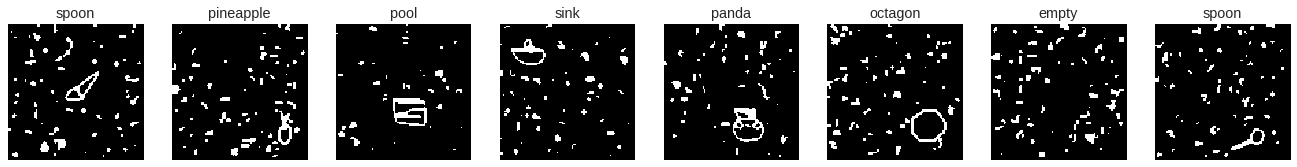

In [17]:
# Random peek for verification - (X_train_preprocessed, y_train_preprocessed)
samples = 8
zscale = 23
f = plt.figure(figsize=(zscale, zscale))
for i in range(samples):
  img_id = np.random.randint(8000)
  img_train = np.reshape(X_train_preprocessed[img_id, :], (100, 100))

  f.add_subplot(1, samples, i+1)
  plt.title(y_train_preprocessed[img_id])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img_train, cmap="gray")
plt.show()

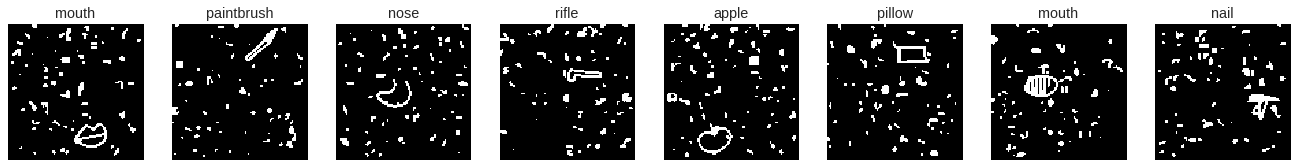

In [18]:
# Random peek for verification - (X_test_preprocessed, y_test_preprocessed)
samples = 8
zscale = 23
f = plt.figure(figsize=(zscale, zscale))
for i in range(samples):
  img_id = np.random.randint(2000)
  img_train = np.reshape(X_test_preprocessed[img_id, :], (100, 100))

  f.add_subplot(1, samples, i+1)
  plt.title(y_test_preprocessed[img_id])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img_train, cmap="gray")
plt.show()

# 9. Looking falting image in denoising - at 4090, label paintbrush 

X_train_preprocessed[4089].shape=  (10000,)
X_train_preprocessed[4090].shape=  (10000,)
X_train_preprocessed[4091].shape=  (10000,)


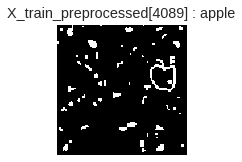

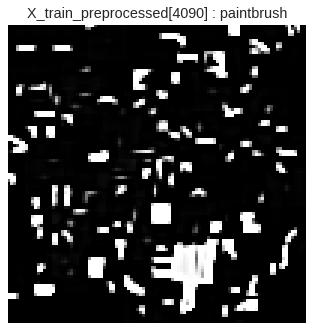

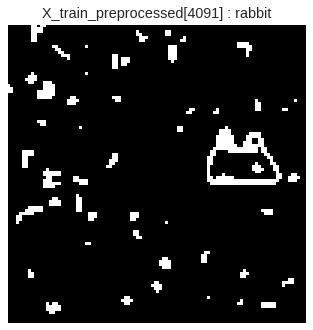

In [0]:
# 4089-4090-4091 X_train_denoised vs X_train_bright
print("X_train_preprocessed[4089].shape= ", X_train_preprocessed[4089].shape)
print("X_train_preprocessed[4090].shape= ", X_train_preprocessed[4090].shape)
print("X_train_preprocessed[4091].shape= ", X_train_preprocessed[4091].shape)

f = plt.figure()
f.add_subplot(1, 3, 1)
plt.title("X_train_preprocessed[4089] : " + y_train_preprocessed[4089])
plt.xticks([])
plt.yticks([])
plt.imshow(X_train_preprocessed[4089].reshape((100, 100)), cmap="gray")
plt.show(block=True)

f.add_subplot(1, 3, 2)
plt.title("X_train_preprocessed[4090] : " + y_train_preprocessed[4090])
plt.xticks([])
plt.yticks([])
plt.imshow(X_train_preprocessed[4090].reshape((100, 100)), cmap="gray")
plt.show(block=True)

f.add_subplot(1, 3, 3)
plt.title("X_train_preprocessed[4091] : " + y_train_preprocessed[4091])
plt.xticks([])
plt.yticks([])
plt.imshow(X_train_preprocessed[4091].reshape((100, 100)), cmap="gray")
plt.show(block=True)

# 10. Restoring falting img at 4090 - **DONE ALREADY*

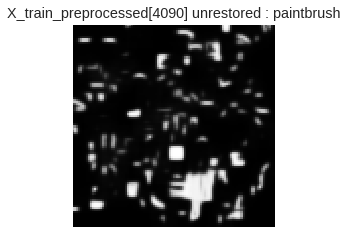

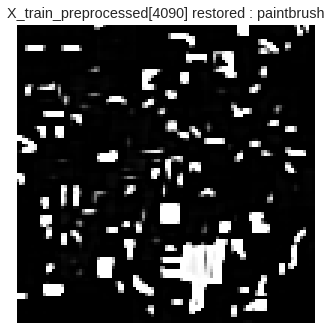

In [0]:
# Restoring 4090 manually - https://www.scipy-lectures.org/advanced/image_processing/auto_examples/plot_sharpen.html
alpha = 5
img_4090 = X_train_preprocessed[4090].reshape((100, 100))

img_4090_filtered = ndimage.gaussian_filter(img_4090, 1)
img_4090_restored = img_4090 + alpha *(img_4090 - img_4090_filtered)
img_4090_restored = skiexpose.rescale_intensity(img_4090_restored, in_range=(0., 1.))

# Plotting
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.title("X_train_preprocessed[4090] unrestored : " + y_train_preprocessed[4090])
plt.xticks([])
plt.yticks([])
plt.imshow(img_4090, cmap="gray")
plt.show(block=True)

f.add_subplot(1, 2, 2)
plt.title("X_train_preprocessed[4090] restored : " + y_train_preprocessed[4090])
plt.xticks([])
plt.yticks([])
plt.imshow(img_4090_restored, cmap="gray")
plt.show(block=True)

X_train_preprocessed[4090] = img_4090_restored.flatten()

In [0]:
# Saving corrected 4090 restore
np.save('train_images_denoised.npy',X_train_preprocessed)
np.save('train_images_denoised_labels.npy', y_train_preprocessed)
np.save('test_images_denoised.npy', X_test_preprocessed)
np.save('test_images_denoised_labels.npy', y_test_preprocessed)

In [0]:
!ls -al "."

total 788484
drwxr-xr-x 1 root root      4096 Nov 21 05:45 .
drwxr-xr-x 1 root root      4096 Nov 21 03:43 ..
drwxr-xr-x 4 root root      4096 Nov 19 21:43 .config
drwxr-xr-x 2 root root      4096 Nov 21 04:17 dataset
drwxr-xr-x 4 root root      4096 Nov 21 03:55 denoised_dataset
drwxr-xr-x 2 root root      4096 Nov 21 05:43 denoised_dataset3
-rw-r--r-- 1 root root   6873831 Nov 21 05:44 denoised_datasets_v2.zip
drwxr-xr-x 3 root root      4096 Nov 21 05:45 denoised_dataset_v2
drwx------ 3 root root      4096 Nov 21 03:45 drive
drwxr-xr-x 2 root root      4096 Nov 19 21:53 sample_data
-rw-r--r-- 1 root root     96128 Nov 21 05:49 test_images_denoised_labels.npy
-rw-r--r-- 1 root root 160000128 Nov 21 05:49 test_images_denoised.npy
-rw-r--r-- 1 root root    384128 Nov 21 05:49 train_images_denoised_labels.npy
-rw-r--r-- 1 root root 640000128 Nov 21 05:49 train_images_denoised.npy


In [0]:
!mkdir "denoised_dataset4"
!cp  "train_images_denoised.npy" "train_images_denoised_labels.npy" "test_images_denoised.npy" "test_images_denoised_labels.npy" "denoised_dataset4"
!ls -al "denoised_dataset4"

total 781740
drwxr-xr-x 2 root root      4096 Nov 21 05:50 .
drwxr-xr-x 1 root root      4096 Nov 21 05:50 ..
-rw-r--r-- 1 root root     96128 Nov 21 05:50 test_images_denoised_labels.npy
-rw-r--r-- 1 root root 160000128 Nov 21 05:50 test_images_denoised.npy
-rw-r--r-- 1 root root    384128 Nov 21 05:50 train_images_denoised_labels.npy
-rw-r--r-- 1 root root 640000128 Nov 21 05:50 train_images_denoised.npy


In [0]:
!zip -r "denoised_datasets_v3.zip" "denoised_dataset4"

  adding: denoised_dataset4/ (stored 0%)
  adding: denoised_dataset4/test_images_denoised_labels.npy (deflated 96%)
  adding: denoised_dataset4/test_images_denoised.npy (deflated 99%)
  adding: denoised_dataset4/train_images_denoised.npy (deflated 99%)
  adding: denoised_dataset4/train_images_denoised_labels.npy (deflated 96%)


In [0]:
!cp "denoised_datasets_v3.zip" "/content/drive/My Drive/collab_notebooks/"
!ls -al "/content/drive/My Drive/collab_notebooks/"

total 103602
-rw------- 1 root root  2824924 Nov 21 05:50 551_kaggle.ipynb
drwx------ 2 root root     4096 Nov 15 08:03 551_project
-rw------- 1 root root    19612 Nov 15 17:30 551_project_notes.ipynb
-rw------- 1 root root 75771842 Nov 13 20:31 all.zip
drwx------ 2 root root     4096 Nov 14 16:11 dataset
-rw------- 1 root root  6873831 Nov 21 05:44 denoised_datasets_v2.zip
-rw------- 1 root root  6860169 Nov 21 05:51 denoised_datasets_v3.zip
-rw------- 1 root root 13727792 Nov 20 16:43 denoised_datasets.zip


# 11. Preprocessing - Dimensionality Reduction

In [0]:
# Setting datasets (RHS = *_preprocessed | *_denoised | *_bright)
X_train = X_train_preprocessed
X_test = X_test_preprocessed
y_train = y_train_preprocessed
y_test = y_test_preprocessed

In [20]:
# (X_train, y_train) XX (X_test, y_test)
print("BEFORE PCA:")
print("X_train------------------------------------\n")
X_rows, X_cols = X_train.shape
print("\tX_train shape: ", X_train.shape, "\n")
print("\tFeature dimensions: ", X_cols)
print("X_test--------------------------------------\n")
X_rows, X_cols = X_test.shape
print("\tX_train shape: ", X_test.shape, "\n")
print("\tFeature dimensions: ", X_cols)

BEFORE PCA:
X_train------------------------------------

	X_train shape:  (8000, 10000) 

	Feature dimensions:  10000
X_test--------------------------------------

	X_train shape:  (2000, 10000) 

	Feature dimensions:  10000


In [21]:
# Applying PCA to BOTH training set AND validation/testing set
from sklearn.decomposition import PCA
print("PCA fit transforming.....................")
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("..............done.")

PCA fit transforming.....................
..............done.


In [22]:
# Aggregating/accumulating variance ratios on X_train to verify dimensionality reduction
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum_95 = cumsum >= 0.95
reduced_dims = np.argmax(cumsum_95) + 1
print("---------------------------------------------")
print("cumsum.shape = ", cumsum.shape, "\n")
print("cumsum_95.shape = ", cumsum_95.shape, "\n")
print("reduced dims = ", reduced_dims, "\n")
print("cumsum = ", cumsum, "\n")
print("cumsum_95 = ", cumsum_95, "\n")
print("---------------------------------------------")

print("AFTER PCA:")
print("X_train------------------------------------\n")
X_rows, X_cols = X_train_pca.shape
print("\tX_train shape: ", X_train_pca.shape, "\n")
print("\tFeature dimensions: ", X_cols)
print("X_test--------------------------------------\n")
X_rows, X_cols = X_test_pca.shape
print("\tX_train shape: ", X_test_pca.shape, "\n")
print("\tFeature dimensions: ", X_cols)

---------------------------------------------
cumsum.shape =  (3764,) 

cumsum_95.shape =  (3764,) 

reduced dims =  3764 

cumsum =  [0.00512645 0.01017964 0.01466411 ... 0.94994575 0.94998071 0.95001564] 

cumsum_95 =  [False False False ... False False  True] 

---------------------------------------------
AFTER PCA:
X_train------------------------------------

	X_train shape:  (8000, 3764) 

	Feature dimensions:  3764
X_test--------------------------------------

	X_train shape:  (2000, 3764) 

	Feature dimensions:  3764


In [23]:
# Verifying PCA reduction
X_train_pca_recovered = pca.inverse_transform(X_train_pca)
X_test_pca_recovered = pca.inverse_transform(X_test_pca)

print("RECOVERED PCA:")
print("X_train------------------------------------\n")
X_rows, X_cols = X_train_pca_recovered.shape
print("\tX_train shape: ", X_train_pca_recovered.shape, "\n")
print("\tFeature dimensions: ", X_cols)
print("X_test--------------------------------------\n")
X_rows, X_cols = X_test_pca_recovered.shape
print("\tX_train shape: ", X_test_pca_recovered.shape, "\n")
print("\tFeature dimensions: ", X_cols)

RECOVERED PCA:
X_train------------------------------------

	X_train shape:  (8000, 10000) 

	Feature dimensions:  10000
X_test--------------------------------------

	X_train shape:  (2000, 10000) 

	Feature dimensions:  10000


In [24]:
# Calculating projection loss and evaluating projection manually
X_train_projected = (X_train - pca.mean_) @ (pca.components_.T)
X_train_projected_recovered = (X_train_projected @ pca.components_) + pca.mean_

loss_fit_transform = ((X_train - X_train_pca_recovered)**2).mean()
loss_projected = ((X_train - X_train_projected_recovered)**2).mean()


print("projection matrix(orthonormal).shape = ", pca.components_.shape)
print("mean vector.shape = ", pca.mean_.shape, "\n")
print("X_train_projected.shape = ", X_train_projected.shape)
print("X_train_projected_recovered.shape = ", X_train_projected_recovered.shape, "\n")
print("projection loss for fit_transform method = ", loss_fit_transform)
print("projection loss for projected method = ", loss_projected)

projection matrix(orthonormal).shape =  (3764, 10000)
mean vector.shape =  (10000,) 

X_train_projected.shape =  (8000, 3764)
X_train_projected_recovered.shape =  (8000, 10000) 

projection loss for fit_transform method =  0.0031877862189637865
projection loss for projected method =  0.003187786218963786


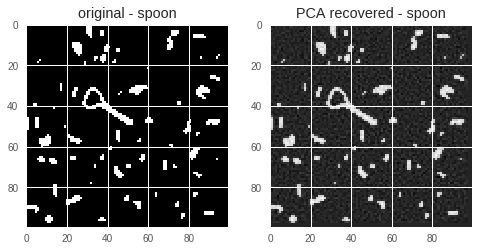

In [25]:
img_id = np.random.randint(8000)
img_train = np.reshape(X_train[img_id, :], (100, 100))
img_train_pca_recovered = np.reshape(X_train_pca_recovered[img_id, :], (100, 100))

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.title("original - "+ y_train[img_id])
#plt.xticks([])
#plt.yticks([])
plt.imshow(img_train, cmap="gray")

f.add_subplot(1, 2, 2)
plt.title("PCA recovered - "+ y_train[img_id])
#plt.xticks([])
#plt.yticks([])
plt.imshow(img_train_pca_recovered, cmap="gray")
plt.show(block=True)

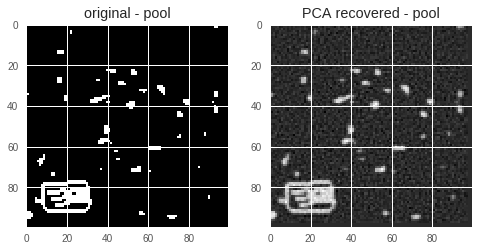

In [26]:
img_id = np.random.randint(2000)
img_test = np.reshape(X_test[img_id, :], (100, 100))
img_test_pca_recovered = np.reshape(X_test_pca_recovered[img_id, :], (100, 100))

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.title("original - "+ y_test[img_id])
#plt.xticks([])
#plt.yticks([])
plt.imshow(img_test, cmap="gray")

f.add_subplot(1, 2, 2)
plt.title("PCA recovered - "+ y_test[img_id])
#plt.xticks([])
#plt.yticks([])
plt.imshow(img_test_pca_recovered, cmap="gray")
plt.show(block=True)

# 12. Preprocessing - Image Denoising **EXPERIMENTS*

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ORIGNAL IMAGES:


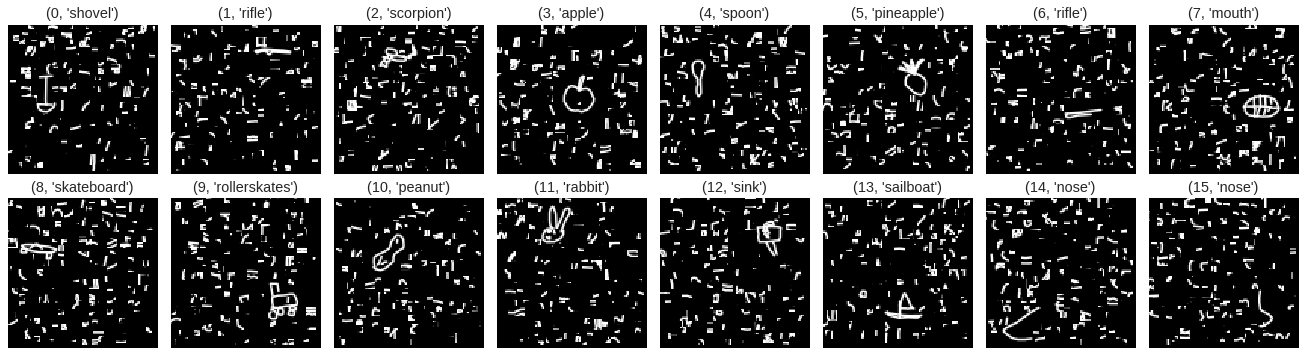

		min pixel intensity value:  0 , max pixel intensity value:  255 , mean pixel intensity value:  22.61086875
PROCESSED IMAGES:


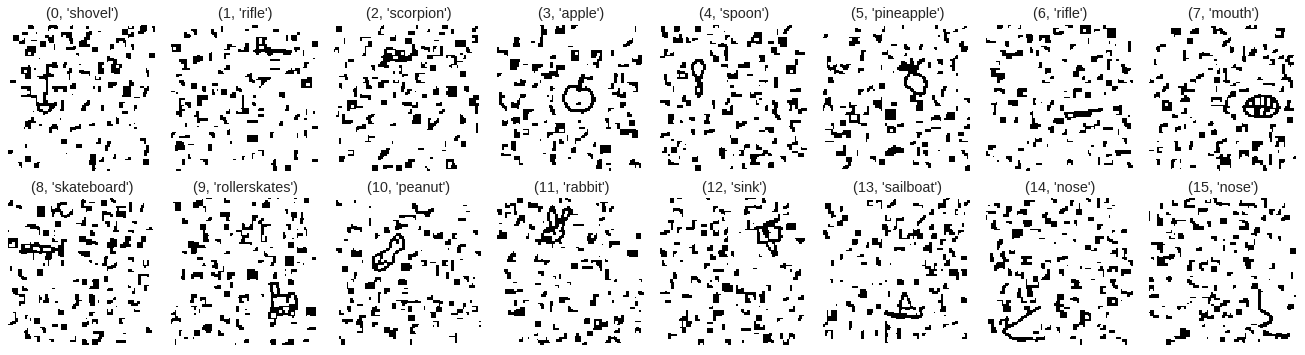

		min pixel intensity value:  0 , max pixel intensity value:  1 , mean pixel intensity value:  0.8627


In [0]:
# Image denoising and filtering (X_train_pca, y_train) XX (X_test_pca, y_test)
np.set_printoptions(threshold=1000, suppress=False)
def plot_images(X, X_labels, columns, rows, zscale):
  fig = plt.figure(figsize=(zscale*(columns+1), zscale*(rows+1)))
  gs = gridspec.GridSpec(rows, columns, wspace=0.05, hspace=0.15, 
                        top=1-0.5/(rows+1), bottom=0.5/(rows+1), 
                        left=0.5/(columns+1), right=1-0.5/(columns+1))
  
  for i in range(rows):
    for j in range(columns):
      image = X[i*columns + j]
      image = np.reshape(image, (100, 100))
      ax = plt.subplot(gs[i, j])
      ax.imshow(image, cmap='gray')
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_xticklabels([])
      ax.set_yticklabels([])
      ax.set_title(X_labels[i*columns + j])
  plt.show()

#(based on http://blog.mathocr.com/2017/06/25/image-processing-for-text-recognition.html)
def process_images(X,):
  X_processed = np.empty((0, 10000), dtype=np.uint8)
  
  for x in X:
    x = np.reshape(x, (100, 100))
    
    # Binarizing image using gaussian blur for denoising and threshold_minimum for HOG
    #x_sigma = np.nanmean(skirestore.estimate_sigma(x, multichannel=False))
    #gaussian_blur_x = skifilters.gaussian(x, sigma=x_sigma)
    #x_processed = gaussian_blur_x
    #print('gaussian x =', x)
    
    #threshold_x = skifilters.threshold_local(x, block_size=101, method='gaussian')
    #x_processed = (x > threshold_x).flatten()
    #print('x_processed = ', x_processed, 'shape =', x_processed.shape)
    
    #binary_x = gaussian_blur_x > threshold_x
    #x_processed = binary_x.flatten()
    #print('x_processed = ', x_processed, 'shape =', x_processed.shape)
    
    # Gaussian total variation filter denoising
    x_sigma = np.nanmean(skirestore.estimate_sigma(x, multichannel=True))
    #x_sigma = skirestore.estimate_sigma(x)
    #print('estimated gaussian noise standard deviation for x = ', x_sigma)
    #x_processed = skirestore.denoise_tv_chambolle(x, weight=5*x_sigma)
    
    # Median rank filter denoising
    #x_processed = skifilters.rank.median(x.astype(int), skimorph.diamond(0.7))
    
    # Non-local means filter denoising
    patch_dict = dict(patch_size=6,      # 5 => 5x5 patches
                patch_distance=7)  # 6 => 13x13 search area
    x_processed = skirestore.denoise_nl_means(image=x, h=1*x_sigma, fast_mode=False, multichannel=True, **patch_dict)
    
    #########################################################
    # Applying PCA to reduce the dimension of the sample image
    #################################################sklearndecomp AFTER splitting
    
    # Thresholding (local) in order to seperate drawing from background
    threshold_x = skifilters.threshold_local(x, block_size=3, offset=3)
    #threshold_x = skifilters.threshold_minimum(x)
    #threshold_x = skifilters.threshold_sauvola(x_processed, window_size=3)
    x_processed = x_processed > threshold_x
    
    # Erosion 
    max_intensity = 1
    selam = skimorph.square(2)
    opened_x = skimorph.opening(x_processed, selam)
    x_processed = opened_x
    #x_processed = max_intensity - opened_x
    #eroded_x = skimorph.erosion(x_processed, selam)
    #eroded_x_bin = max_intensity - eroded_x
    #x_processed = skimorph.thin(eroded_x_bin)
    
    # TO-DO: Sharpening
    # psf = np.ones((5, 5)) / 25
    # x_processed = skirestore.richardson_lucy(x_processed, psf, iterations=30)
    
    X_processed = np.append(X_processed, [(x_processed.flatten()).astype(np.uint8)], axis=0)
    #print('X_processed = ', X_processed)
  
  return X_processed
    
#Printing:
num_pics = 16
num_cols = 8
num_rows = (num_pics//num_cols)
zscale = 2.25
X_processed = process_images(X_train[0:num_pics, 1])
print("ORIGNAL IMAGES:")
plot_images(X_train[:, 1], X_train_labels, num_cols, num_rows, zscale)
X_train_flat = np.stack(X_train[0:num_pics, 1].ravel()).ravel()
print("\t\tmin pixel intensity value: ", np.min(X_train_flat), ", max pixel intensity value: ", np.max(X_train_flat), ", mean pixel intensity value: ", np.average(X_train_flat))
print("PROCESSED IMAGES:")
plot_images(X_processed, X_train_labels, num_cols, num_rows, zscale)
X_processed_flat = np.stack(X_processed[0:num_pics].ravel()).ravel()
print("\t\tmin pixel intensity value: ", np.min(X_processed_flat), ", max pixel intensity value: ", np.max(X_processed_flat), ", mean pixel intensity value: ", np.average(X_processed_flat))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


estimated gaussian noise standard deviation for x =  63.52211920536708
estimated gaussian noise standard deviation for x =  71.58451446926951
estimated gaussian noise standard deviation for x =  67.47816742009513
estimated gaussian noise standard deviation for x =  66.24798526950157
estimated gaussian noise standard deviation for x =  69.239346159773
estimated gaussian noise standard deviation for x =  64.45899486871846
estimated gaussian noise standard deviation for x =  71.98373746703214
estimated gaussian noise standard deviation for x =  72.745288551353
estimated gaussian noise standard deviation for x =  74.72978207438452
estimated gaussian noise standard deviation for x =  69.0476035090349
estimated gaussian noise standard deviation for x =  71.99487291093888
estimated gaussian noise standard deviation for x =  67.73825572315776
estimated gaussian noise standard deviation for x =  65.74647901831194
estimated gaussian noise standard deviation for x =  66.30221934578564
estimated g

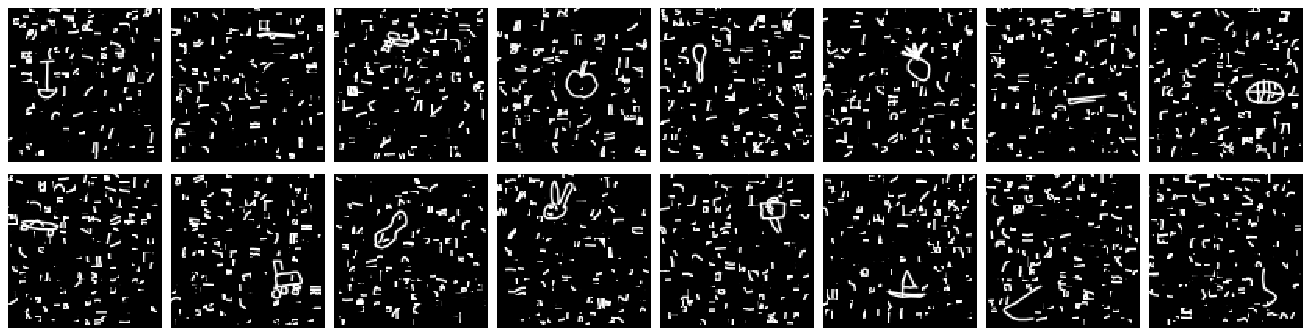

PROCESSED IMAGES:


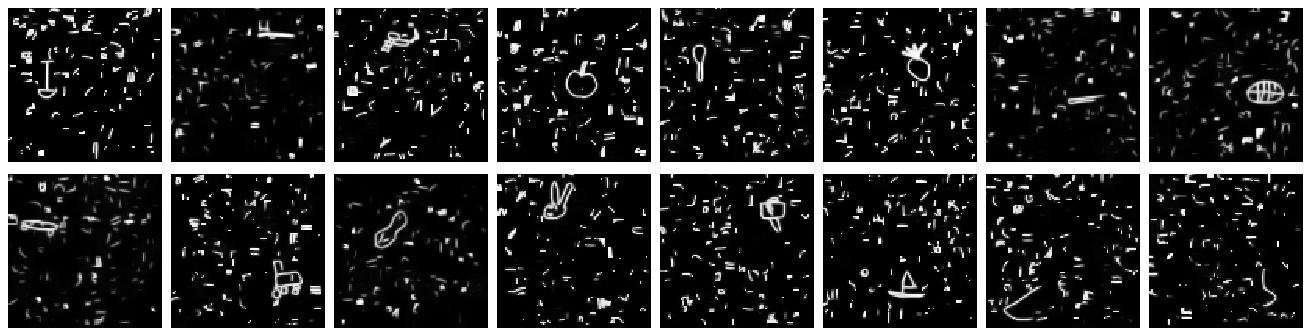

LABELS:
[( 0, 'shovel') ( 1, 'rifle') ( 2, 'scorpion') ( 3, 'apple') ( 4, 'spoon')
 ( 5, 'pineapple') ( 6, 'rifle') ( 7, 'mouth') ( 8, 'skateboard')
 ( 9, 'rollerskates') (10, 'peanut') (11, 'rabbit') (12, 'sink')
 (13, 'sailboat') (14, 'nose') (15, 'nose')]


In [0]:
#(based on http://blog.mathocr.com/2017/06/25/image-processing-for-text-recognition.html)
def process_images2(X,):
  X_processed = np.empty((0, 10000), float)
  
  for x in X:
    x = np.reshape(x, (100, 100))
    
    # Applying HOG
    
    
    
    #print('X_processed = ', X_processed)
  
  return X_processed
    
#Printing:
num_pics = 32
num_cols = 8
num_rows = (num_pics//num_cols)
zscale = 2.25
X_processed = process_images(X_train[0:num_pics, 1])
print("ORIGNAL IMAGES:")
plot_images(X_train[:, 1], X_train_labels, num_cols, num_rows, zscale)
print("PROCESSED IMAGES:")
plot_images(X_processed, X_train_labels, num_cols, num_rows, zscale)

# 13. Baselines - Logistic Regression

In [0]:
import seaborn as sns

In [0]:
# Function - Print confusion matrix
def plot_confusion_matrix(C, score, name):
  plt.figure(figsize=(18,18))
  sns.heatmap(C.T, annot=True, fmt='d', linewidth=.5, square = True, cmap='coolwarm')
  plt.xlabel('Actual Label')
  plt.ylabel('Predicted Label')
  all_sample_title = '{0} - Accuracy Score: {1}'.format(name, score)
  plt.title(all_sample_title, size=15)
  sns.plt.show()

In [0]:
# Training Logistic Regression baseline -- (X_train_pca, y_train) XX (X_test_pca, y_test)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()#solver='lbfgs')
print("Training logistic regression model......")
print(logisticRegr.fit(X_train_pca, y_train))
print("..............................done.")

Training logistic regression model......


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
..............................done.


In [0]:
# Accuracy of classifier:
score = logisticRegr.score(X_test_pca, y_test)
print("Logistic Regression prediction accuracy = ", score)

Logistic Regression prediction accuracy =  0.0365


In [0]:
# Getting predicted labels:
print("Computing predictions for test set............")
y_predict = logisticRegr.predict(X_test_pca)
print(".................................done.")

Computing predictions for test set............
.................................done.


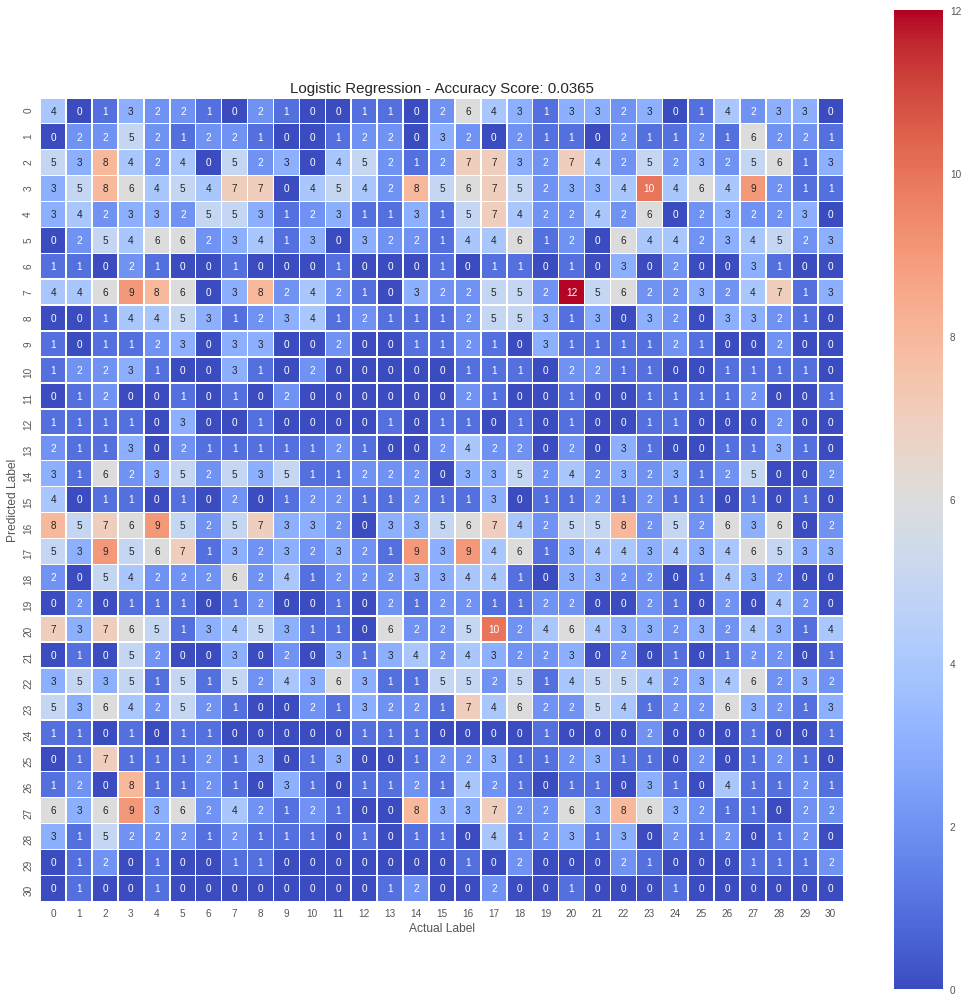

In [0]:
# Confusion matrix of classifier
from sklearn import metrics
cM = metrics.confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cM, score, "Logistic Regression")

# 14. Baselines - Linear SVM

In [0]:
# Training Linear SVM baseline -- (X_train_pca, y_train) XX (X_test_pca, y_test) - finding C parameter (soft margin) using grid search
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
parameters = {'C': [(2**(-5)), (2**(-3)), (2**(-1)), (2**(1)), (2**(3)), (2**(5)), (2**(7))]}
n_folds = 5
grid = GridSearchCV(LinearSVC(), parameters, cv=n_folds)
print('Grid Search for best model and parameter C for linear SVM classifier......')
%time print(grid.fit(X_train_pca, y_train))
print("....done.")

Grid Search for best model and parameter C for linear SVM classifier......
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       iid='warn', n_jobs=None,
       param_grid={'C': [0.03125, 0.125, 0.5, 2, 8, 32, 128]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)
CPU times: user 1h 6min 14s, sys: 7.43 s, total: 1h 6min 21s
Wall time: 1h 6min 18s
....done.


In [0]:
# Mean cross-validated score of the best_estimator from grid search:
score = grid.best_score_
print("Linear SVC best score = ", score)

Linear SVC best score =  0.038125


In [0]:
# Re-training the grid search best estimater on X_train_pca
best_model = grid.best_estimator_
print("Training best estimator from linear SVC grid search.....")
%time print(best_model.fit(X_train_pca, y_train))
print("......done.")

Training best estimator from linear SVC grid search.....
LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
CPU times: user 2min 45s, sys: 141 ms, total: 2min 45s
Wall time: 2min 45s
......done.


In [0]:
# Getting predicted labels:
print("Computing predictions for test set............")
y_predict = best_model.predict(X_test_pca)
print(".................................done.")

Computing predictions for test set............
.................................done.


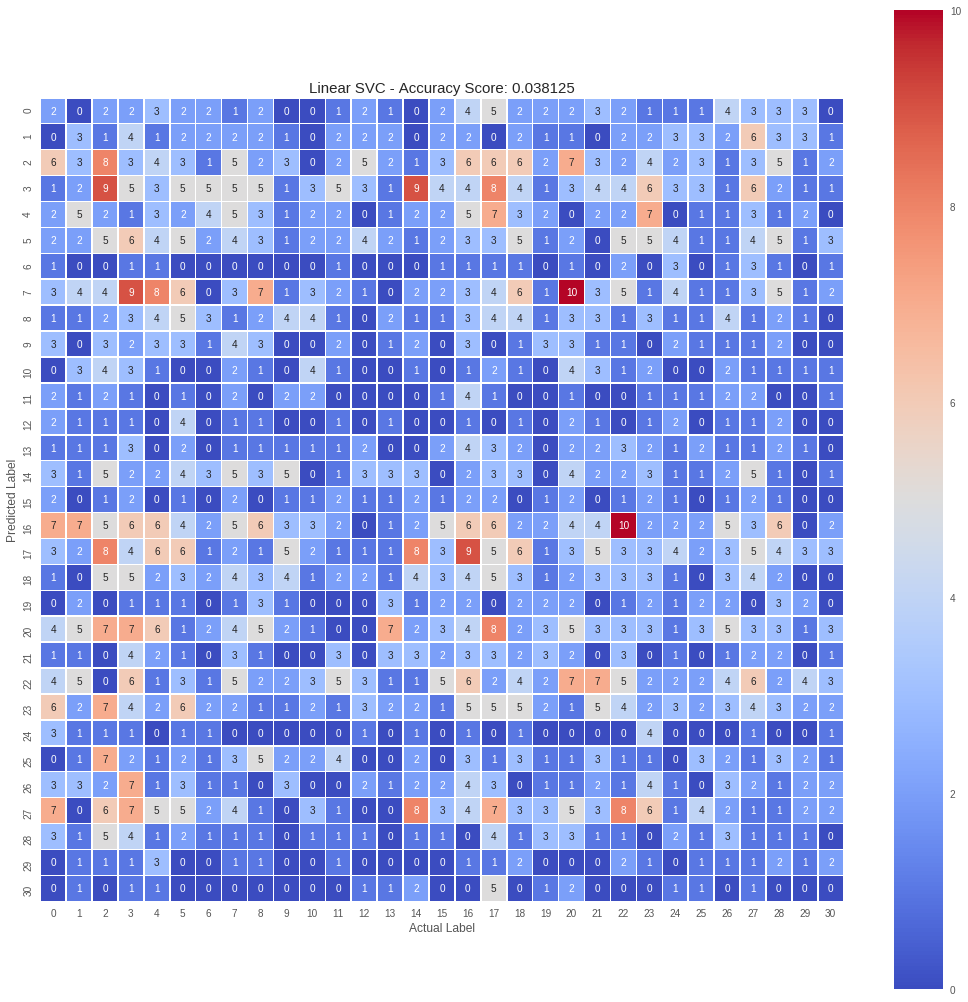

In [0]:
# Confusion matrix of classifier
cM = metrics.confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cM, score, "Linear SVC")

# 15. Attempt 1 - Kernalized SVM

# Attempt 2 - CNN with denoised dataset

(8000, 10000)
(8000,)
paintbrush


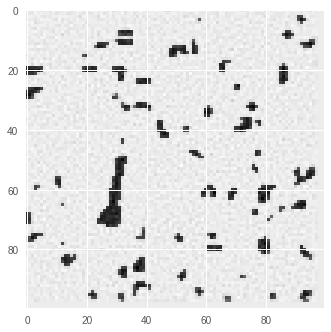

In [27]:
import matplotlib.pyplot as plt
#print(X_train_preprocessed.shape)
print(X_train_pca_recovered.shape)
print(y_train_preprocessed.shape)
#plot the first image in the dataset
print(y_train_preprocessed[0])
plt.imshow(X_train_pca_recovered[0].reshape(100,100))

In [0]:
#reshape data to fit model
X_train = X_train_preprocessed.reshape(X_train_pca_recovered.shape[0],100,100,1)
X_test = X_test_preprocessed.reshape(X_test_pca_recovered.shape[0],100,100,1)

In [0]:
#Image augmentation
from keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
#train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#test_datagen = ImageDataGenerator(rescale=1./255)
datagen = ImageDataGenerator()
datagen.fit(X_train)

In [0]:
def getClassIds(dataset):
  string_id_classes = dict()
  for i in range(dataset.shape[0]):
    classname = dataset[i]
    id = string_id_classes.values()
    if classname not in string_id_classes:
      string_id_classes.update({classname: len(id)})
  return string_id_classes

In [0]:
def convertStringClassesToIds(dataset,string_id_classes):
  class_ids = np.zeros(dataset.shape)
  for i in range(dataset.shape[0]):
    classname = dataset[i]
    id = string_id_classes.get(classname)
    class_ids[i] = id
  return class_ids

In [45]:
from keras.utils import to_categorical
#one-hot encode target column
print(len(y_train_preprocessed))
dictionary = getClassIds(y_train_preprocessed)
print(len(dictionary))
y_train_ids = convertStringClassesToIds(y_train_preprocessed,dictionary)
y_train = to_categorical(y_train_ids)
y_test_ids = convertStringClassesToIds(y_test_preprocessed,dictionary)
y_test = to_categorical(y_test_ids)
y_train[0]

8000
31


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#epochs = [3,4,5]
epochs = [32]
#layers = [1,2,3]
#nodesL1 = [256,128,64,32,16,8]
nodesL1 = [64]
nodesL2 = [32]
#nodesL2 = [256,128,64,32,16,8]
activations = ['relu'] #sigmoid is very bad, I guess tanh aussi
maxscore = 0
batch_size = 32
for activation in activations:
  for node1 in nodesL1:
    for node2 in nodesL2:
      if node1 < node2:
        continue
      for ep in epochs:
        print("combination of",activation,"-",node1,"-",node2,"-",ep)
        model = Sequential()
        model.add(Conv2D(node1, kernel_size=3, activation=activation, input_shape=(100,100,1)))
        model.add(Conv2D(node2, kernel_size=3, activation=activation))
        model.add(Flatten())
        model.add(Dense(31, activation='softmax'))
        model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
        #model.fit(X_train, y_train, epochs=ep)
        #model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=ep)
        #model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train) / 32, epochs=ep)
        train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
        validation_generator= datagen.flow(X_test, y_test, batch_size=batch_size)
#         model.fit_generator(flow, samples_per_epoch=len(X_train), epochs=32)
        model.fit_generator(train_generator,steps_per_epoch=len(X_train) // batch_size,epochs=50,validation_data=validation_generator,validation_steps=len(X_test) // batch_size)
#         scores = model.evaluate(X_test, y_test)
#         acc = scores[1]*100
#         print("combination of",activation,"-",node1,"-",node2,"-",ep,":",acc,"%")
#         if acc > maxscore:
#           maxscore = acc
#           bestact = activation
#           bestn1 = node1
#           bestn2 = node2
#           bestep = ep

combination of relu - 64 - 32 - 32
Epoch 1/50
250/250 [==============================] - 17s 67ms/step - loss: 0.0311 - acc: 0.0529 - val_loss: 0.0311 - val_acc: 0.0670
Epoch 2/50
250/250 [==============================] - 15s 61ms/step - loss: 0.0245 - acc: 0.3934 - val_loss: 0.0342 - val_acc: 0.0422
Epoch 3/50
250/250 [==============================] - 15s 61ms/step - loss: 0.0047 - acc: 0.8921 - val_loss: 0.0372 - val_acc: 0.0518
Epoch 4/50
250/250 [==============================] - 15s 61ms/step - loss: 0.0016 - acc: 0.9647 - val_loss: 0.0364 - val_acc: 0.0498
Epoch 5/50
250/250 [==============================] - 15s 61ms/step - loss: 9.9139e-04 - acc: 0.9801 - val_loss: 0.0348 - val_acc: 0.0452
Epoch 6/50
250/250 [==============================] - 15s 61ms/step - loss: 7.9729e-04 - acc: 0.9860 - val_loss: 0.0355 - val_acc: 0.0462
Epoch 7/50
250/250 [==============================] - 15s 61ms/step - loss: 7.5791e-04 - acc: 0.9872 - val_loss: 0.0353 - val_acc: 0.0498
Epoch 8/50
250/

KeyboardInterrupt: ignored

In [0]:
#predict first 4 images in the test set
results = model.predict(X_test)
print(results.shape)
import csv
with open('sumbmission.csv', mode='w') as submissionfile:
    writer = csv.writer(submissionfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Id', 'Category'])
#     for loop:
#         dictio = dict()
#         classString = dictio.get(predictedid)
#         writer.writerow([str(i),classString])